In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress


In [2]:
#Read the cvs file

Traffic_pd=pd.read_csv("Traffic_Violations.csv")

In [3]:
#Display The Dataframe
Traffic_pd.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [4]:
Traffic_pd.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [5]:
#renaming the column name to year make
Traffic_pd=Traffic_pd.rename(columns={'Year':'Year Make'})
Traffic_pd.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year Make', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [94]:
#getting Year and month  using datetype


Traffic_pd['Date Of Stop'] = pd.to_datetime(Traffic_pd['Date Of Stop'])
#Traffic_pd['Date Of Stop'].dt.year
Traffic_pd['Year'] = Traffic_pd['Date Of Stop'].dt.year
Traffic_pd['Month'] =Traffic_pd['Date Of Stop'].dt.month

In [6]:
Traffic_pd.shape


(1371840, 35)

In [7]:
#dropping the columns
main_traffic_data=Traffic_pd.drop(columns={'Agency', 'SubAgency','Personal Injury', 'Property Damage','Work Zone','Article', 'Accident'})

In [8]:
#dropping columns to get the dataframe
main_traffic_data.columns
final_data=main_traffic_data.drop(columns={'Location', 'Latitude','Longitude','Commercial License','Commercial Vehicle','Driver State','Arrest Type'})

In [9]:
final_data.shape


(1371840, 21)

In [10]:
#droping the missing or NaN rows from dataframe
final_data.dropna(how='any',inplace=True)
final_data.count()

Date Of Stop               1254906
Time Of Stop               1254906
Description                1254906
Belts                      1254906
Fatal                      1254906
HAZMAT                     1254906
Alcohol                    1254906
State                      1254906
VehicleType                1254906
Year Make                  1254906
Make                       1254906
Model                      1254906
Color                      1254906
Violation Type             1254906
Charge                     1254906
Contributed To Accident    1254906
Race                       1254906
Gender                     1254906
Driver City                1254906
DL State                   1254906
Geolocation                1254906
dtype: int64

In [11]:
#using the search word in "Description as SPEED we put all the other Charges under the same description with 201-801 
#repeating the same for remaining Description "
final_data.loc[final_data['Description'].str.contains('SPEED', case=False),'Description']='SPEEDING' 
final_data.loc[final_data['Description'].str.contains('SPEED', case=False),'Charge']='201-801'
final_data.loc[final_data['Description'].str.contains('TRAFFIC CONTROL DEVICE', case=False),'Description']='TRAFFIC CONTROLDEVICE' 
final_data.loc[final_data['Description'].str.contains('TRAFFIC CONTROL DEVICE', case=False),'Charge']='21-201' 


In [12]:
final_data.loc[final_data['Description'].str.contains('REGISTRATION CARD|DISPLAY REG. CARD',case=False),'Description']='FAILURE TODISPLAY REGISTRATION CARD'
final_data.loc[final_data['Description'].str.contains('REGISTRATION CARD|DISPLAY REG. CARD',case=False),'Charge']='13-409'

In [13]:
final_data.loc[final_data['Description'].str.contains('SUSPENDED REGISTRATION|UNREGISTERED MOTOR|UNPAID REGISTRATION|CANCELLED REGISTRATION|REVOKED REGISTRATION|UNREG. VEH| PROPER VEHICLE I.D', case=False),'Description']='SUSPENDED REGISTRATION' 
final_data.loc[final_data['Description'].str.contains('SUSPENDED REGISTRATION|UNREGISTERED MOTOR|UNPAID REGISTRATION|CANCELLED REGISTRATION|REVOKED REGISTRATION|UNREG. VEH| PROPER VEHICLE I.D', case=False),'Charge']='13-401' 

In [14]:
final_data.loc[final_data['Description'].str.contains('STOP AT STOP|YIELD SIGN', case=False),'Description']='STOP AT STOP' 
final_data.loc[final_data['Description'].str.contains('STOP AT STOP|YIELD SIGN', case=False),'Charge']='21-707'

In [15]:

final_data.loc[final_data['Description'].str.contains('DISPLAY LICENSE|HAVE LIC.|FALSE AND FICTITIOUS NAME|SIGN SIGNATURE|LICENSE',case=False),'Description']='SUSPENDED LICENSE'
final_data.loc[final_data['Description'].str.contains('DISPLAY LICENSE|HAVE LIC.|FALSE AND FICTITIOUS NAME|SIGN SIGNATURE|LICENSE',case=False),'Charge']='16-112'

In [16]:
final_data.loc[final_data['Description'].str.contains('ELECTRONIC|TEXT|TELEPHONE|ATEXT|WIRELESS COMMUNICATION|WRITING|SENDING|MSG.|PHONE|EAR'),'Description']="ELECTRONIC DEVICE DISTRACTION"
final_data.loc[final_data['Description'].str.contains('ELECTRONIC|TEXT|TELEPHONE|ATEXT|WIRELESS COMMUNICATION|WRITING|SENDING|MSG.|PHONE|EAR'),'Charge']="21-1124"

In [17]:
final_data.loc[final_data['Description'].str.contains('REGISTRATION PLATE|VALIDATION TABS|PLATE|TAGS|REG. PLATE'),"Description"]="DISPLAY REGISTRATION PLATE"
final_data.loc[final_data['Description'].str.contains('REGISTRATION PLATE|VALIDATION TABS|PLATE|TAGS|REG. PLATE'),"Charge"]="13-411"

In [18]:
final_data.loc[final_data['Description'].astype(str).str.contains('STOP LIGHTS',case=False),"Description"]="NOSTOP LIGHTS"
final_data.loc[final_data['Description'].astype(str).str.contains('STOP LIGHTS',case=False),"Charge"]="64"

In [19]:
final_data.loc[final_data['Description'].astype(str).str.contains('seat|seatbelt|belt',case=False),"Description"]="NO SEAT BELT/CHILD SAFTEY"
final_data.loc[final_data['Description'].astype(str).str.contains('seat|seatbelt|belt',case=False),"Charge"]="22-412"

In [20]:

final_data.loc[final_data['Description'].astype(str).str.contains('TRAFFIC LANE|CENTER LANE|TURN LANE|CHANGING LANES|UNSAFE LANE|DESIGNATED LANE',case=False),"Description"]="IMPROPER LANECHANGE"
final_data.loc[final_data['Description'].astype(str).str.contains('IMPROPER LANECHANGE',case=False),"Charge"] = "21-309."

In [21]:
final_data.loc[final_data['Description'].astype(str).str.contains('LIGHTED LAMPS|LIGHTED HEAD|LIGHTED',case=False),"Description"]="WITHOUTLIGHTED HEADLAMPS"
final_data.loc[final_data['Description'].astype(str).str.contains('LIGHTED LAMPS|LIGHTED HEAD|LIGHTED',case=False),"Charge"]="22-201"

In [22]:
final_data.loc[final_data['Description'].astype(str).str.contains('AGGRESSIVE DRIVING|NEGLIGENT DRIVING|RECKLESS DRIVING',case=False),"Description"]="NEGLIGENT DRIVING"
final_data.loc[final_data['Description'].astype(str).str.contains('AGGRESSIVE DRIVING|NEGLIGENT DRIVING|RECKLESS DRIVING',case=False),"Charge"]="22-901"

In [23]:
#since the OR srting is large assinging the Charge with The Description name "STOPAT REDSIGNAL" under 21-202 repeated same below
final_data.loc[final_data['Description'].astype(str).str.contains('RED SIGNAL|RED TRAFFIC SIGNAL|MAKE REQUIRED STOP|RIGHT-OF-WAY|PAVEMENT MARK|STOP AT SIGN|RED ARROW SIGNAL'),"Description"]="STOPAT REDSIGNAL"
final_data.loc[final_data['Description'].astype(str).str.contains('STOPAT REDSIGNAL'),"Charge"]="21-202"

In [24]:
final_data.loc[final_data['Description'].astype(str).str.contains('INFLUENCE OF ALCOHOL|ALCOHOL|INFLUENCE OF ALCOHOL|CONTROLLED DANGEROUS SUBSTANCE|IMPAIRED BY DRUGS'),"Description"]="INFLUENCE OF ALCOHOL"
final_data.loc[final_data['Description'].astype(str).str.contains('INFLUENCE OF ALCOHOL'),"Charge"]="21-902"

In [25]:
final_data.loc[final_data['Description'].astype(str).str.contains('WINDOW TINTING|SAFETY GLASS'),"Description"]="UNAUTHORIZED WINDOW TINTING"
final_data.loc[final_data['Description'].astype(str).str.contains('UNAUTHORIZED WINDOW TINTING'),"Charge"]="22-406"

In [26]:
final_data.loc[final_data['Description'].astype(str).str.contains('HEADLIGHTS|HEADLIGHT AIM',case=False),"Description"]="HEADLIGHTS"
final_data.loc[final_data['Description'].astype(str).str.contains('HEADLIGHTS'),"Charge"]="55"

In [27]:

final_data.loc[final_data['Description'].astype(str).str.contains('REQUIRED MINIMUM EQUIPMENT',case=False),"Description"]="HWY. W/O REQUIRED MINIMUM EQUIPMENT"
final_data.loc[final_data['Description'].astype(str).str.contains('HWY. W/O REQUIRED MINIMUM EQUIPMENT'),"Charge"]="23-104"


In [28]:
#Dropping the Charges and hence the rows with value_counts of Charge is less than 7500 that leaves us with 21 Charges to work
#Did it in end to encoperate maximum counts and prevent data loss
s=final_data.Charge.value_counts().gt(7500)
new_data=final_data.loc[final_data.Charge.isin(s[s].index)]

In [29]:
#new_data[new_data['Charge'].astype(str).str.contains('69')].Description.value_counts()


In [30]:
#with the reduced dataframe the data is cleaned in the same manner
new_data.loc[new_data['Description'].astype(str).str.contains('LANE NOT IMMED.|EMERG. VEH|MOVE OVER|FAILURE OF DR. '),"Description"]="FAILURE TO ADJ EMERGENCY VEH"
new_data.loc[new_data['Description'].astype(str).str.contains('FAILURE TO ADJ EMERGENCY VEH'),"Charge"]="21-405"

C:\Users\pghar\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
new_data.loc[new_data['Description'].astype(str).str.contains('RIGHT HALF OF ROADWAY|RIGHT OF CENTER'),"Description"]="FAILURE TO DRIVE RIGHT"
new_data.loc[new_data['Description'].astype(str).str.contains('FAILURE TO DRIVE RIGHT'),"Charge"]="21-301"

C:\Users\pghar\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
new_data.loc[new_data['Description'].astype(str).str.contains(' WHILE LIC.|WHILE SUSP. UNDER|SUSP|16-303 H|21-901|26-204|FAILURE TO STOP',case=False),"Description"]="DRIVING WITH SUSP.LICEN"
new_data.loc[new_data['Description'].astype(str).str.contains('DRIVING WITH SUSP.LICEN'),"Charge"]="16-303"

C:\Users\pghar\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
new_data.loc[new_data['Description'].astype(str).str.contains(' UNINSURED VEHICLE|UNINSURED|INSURED|INSURANCE|KNOWINGLY DRIVING|TAG NOT|MARYLAND|UNISURED'),"Description"]="UNINSURED VEHICLE"
new_data.loc[new_data['Description'].astype(str).str.contains('UNINSURED VEHICLE'),"Charge"]="17-707"

C:\Users\pghar\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
new_data.loc[new_data['Description'].astype(str).str.contains(' TURNING LEFT FAIL|LEFT TURN'),"Description"]="TURNING LEFT FAIL"
new_data.loc[new_data['Description'].astype(str).str.contains('TURNING LEFT FAIL'),"Charge"]="21-402"

C:\Users\pghar\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
new_data.loc[new_data['Charge'].astype(str).str.contains('TURNING LEFT FAIL'),"Charge"]="21-402"

C:\Users\pghar\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
#checking the data 
new_data.Charge.value_counts()


16-303        207480
201-801       203409
21-201(a1)    102115
21-1124        99761
13-411         77552
13-409         62038
21-202         56548
21-707         42125
21-902         38021
22-412         31251
22-201         31095
64             24888
21-309.        24849
22-901         22630
22-406         12132
55             11162
23-104         10230
21-301          9589
21-405          8997
17-707          7656
21-402          7521
Name: Charge, dtype: int64

In [37]:
new_data.columns


Index(['Date Of Stop', 'Time Of Stop', 'Description', 'Belts', 'Fatal',
       'HAZMAT', 'Alcohol', 'State', 'VehicleType', 'Year Make', 'Make',
       'Model', 'Color', 'Violation Type', 'Charge', 'Contributed To Accident',
       'Race', 'Gender', 'Driver City', 'DL State', 'Geolocation'],
      dtype='object')

In [38]:
#lastly dropping all the other columns as discussed
output_data_CSV=new_data.drop(columns={'Belts', 'Fatal','HAZMAT', 'Alcohol','VehicleType', 'Year Make', 'Make',
       'Model', 'Color', 'Violation Type','Driver City', 'DL State'})

In [39]:
#since the Description shows two missing counts Headlight AIM its dropped to have uniformity
output_data_CSV.Description.value_counts()




DRIVING WITH SUSP.LICEN                207480
SPEEDING                               203409
TRAFFIC CONTROLDEVICE                  102115
ELECTRONIC DEVICE DISTRACTION           99761
DISPLAY REGISTRATION PLATE              77552
FAILURE TODISPLAY REGISTRATION CARD     62038
STOPAT REDSIGNAL                        56548
STOP AT STOP                            42125
INFLUENCE OF ALCOHOL                    38021
NO SEAT BELT/CHILD SAFTEY               31251
WITHOUTLIGHTED HEADLAMPS                31095
NOSTOP LIGHTS                           24888
IMPROPER LANECHANGE                     24849
NEGLIGENT DRIVING                       22630
UNAUTHORIZED WINDOW TINTING             12132
HEADLIGHTS                              11162
HWY. W/O REQUIRED MINIMUM EQUIPMENT     10230
FAILURE TO DRIVE RIGHT                   9589
FAILURE TO ADJ EMERGENCY VEH             8997
UNINSURED VEHICLE                        7656
TURNING LEFT FAIL                        7521
Name: Description, dtype: int64

In [40]:
#dropping HEADLIGHT AIM
Traffic_final_data=output_data_CSV[output_data_CSV.Description.str.contains("HEADLIGHT AIM|Headlight Aim") == False]

In [41]:
#saving to CSV file
Traffic_final_data.to_csv("Traffic_violations_final.csv", encoding="utf-8", index=False)

In [42]:
#Checking the data to see the Description  and Charges match
Traffic=Traffic_final_data.Description.value_counts().reset_index()
Traffic= Traffic.rename(columns={'index': 'Description', 'Description': 'number of charges'})
Traffic

,Description,number of charges
0,DRIVING WITH SUSP.LICEN,207480
1,SPEEDING,203409
2,TRAFFIC CONTROLDEVICE,102115
3,ELECTRONIC DEVICE DISTRACTION,99761
4,DISPLAY REGISTRATION PLATE,77552
5,FAILURE TODISPLAY REGISTRATION CARD,62038
6,STOPAT REDSIGNAL,56548
7,STOP AT STOP,42125
8,INFLUENCE OF ALCOHOL,38021
9,NO SEAT BELT/CHILD SAFTEY,31251


In [43]:
#Traffic_final_data.Charge.value_counts().reset_index()

In [44]:
Traffic_final_data.head()

,Date Of Stop,Time Of Stop,Description,State,Charge,Contributed To Accident,Race,Gender,Geolocation
1,08/29/2017,10:19:00,TRAFFIC CONTROLDEVICE,VA,21-201(a1),No,WHITE,F,"(38.981725, -77.0927566666667)"
6,10/08/2013,13:23:00,DRIVING WITH SUSP.LICEN,MD,16-303,No,HISPANIC,M,"(39.0933833333333, -77.0795516666667)"
11,03/19/2012,16:10:00,ELECTRONIC DEVICE DISTRACTION,VA,21-1124,No,HISPANIC,M,"(38.9827307333333, -77.1007551666667)"
12,06/09/2012,21:19:00,NO SEAT BELT/CHILD SAFTEY,MD,22-412,No,WHITE,F,"(39.06914295, -76.9696780666667)"
13,12/20/2012,00:41:00,INFLUENCE OF ALCOHOL,MD,21-902,No,WHITE,M,"(38.9835782, -77.09310515)"


Text(0.5,1,'Traffic Charges')

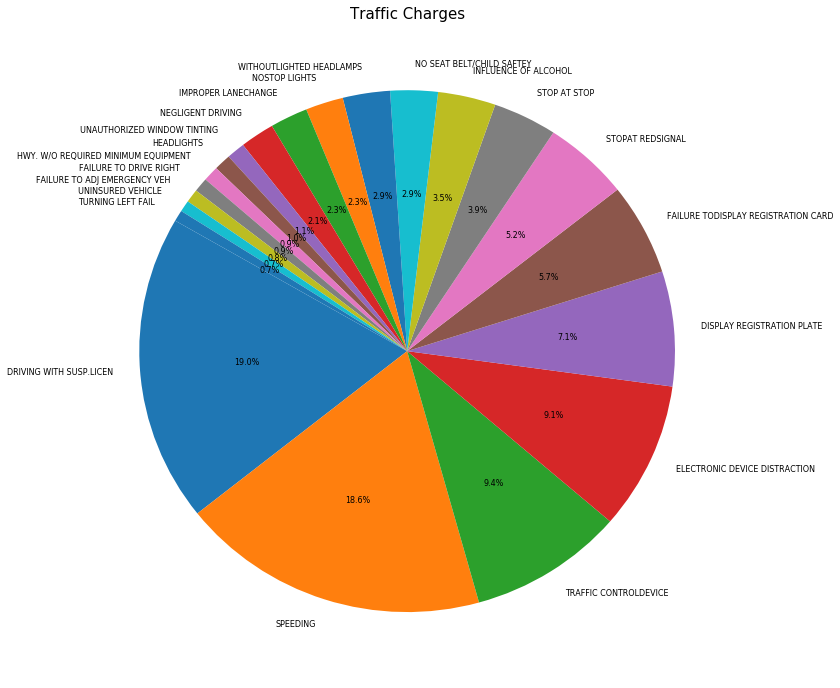

In [45]:
# Build Pie Chart for all traffic charges
plt.rcParams['font.size'] = 8.0
fig = plt.figure(figsize=[12, 12])
plt.pie(Traffic["number of charges"],labels=Traffic["Description"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('Traffic Charges',fontsize= 15)


Text(0,0.5,'number of charges')

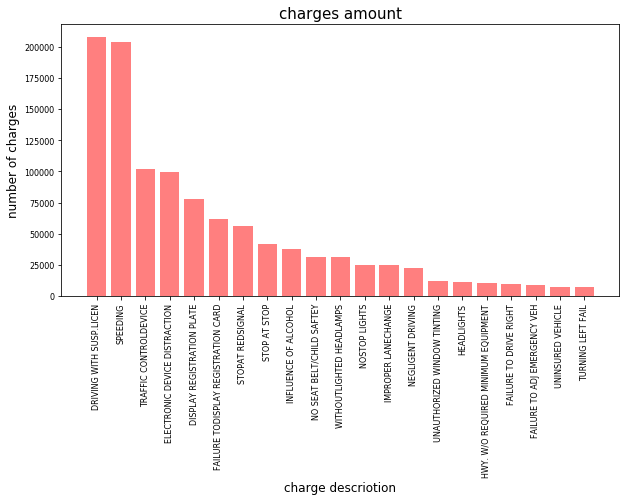

In [46]:
# Build bar Chart to compare the charts and select the best one
x_axis = np.arange(len(Traffic.index))
plt.figure(figsize=(10, 5))
plt.bar(x_axis, Traffic["number of charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = Traffic["Description"]
plt.xticks(tick_locations, tick_title , rotation=90)
plt.title("charges amount"  ,fontsize= 15)
plt.xlabel("charge descriotion",fontsize= 12)
plt.ylabel("number of charges" ,fontsize= 12)

In [47]:
#Comparing Male and Female charges amount
Traffic=Traffic_final_data.Gender.value_counts().reset_index()
Traffic= Traffic.rename(columns={'index': 'Gender', 'Gender': 'Number of charges'})
Traffic=Traffic[Traffic.Gender!='U']
Traffic

,Gender,Number of charges
0,M,721506
1,F,369266


Text(0.5,1,'All Traffic Charges by Gender')

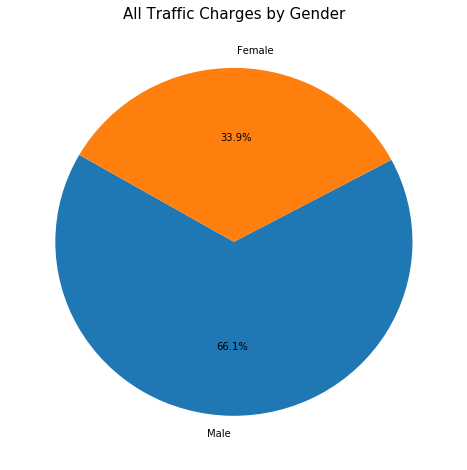

In [48]:
# Build Pie Chart for all Traffic charges based on Gender
plt.rcParams['font.size'] = 10.0
fig = plt.figure(figsize=[8, 8])
plt.pie(Traffic["Number of charges"],labels=["Male" , "Female"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('All Traffic Charges by Gender',fontsize= 15)


Text(0,0.5,'Number Of Charges')

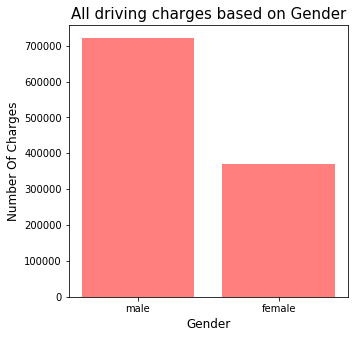

In [49]:
# Build bar Chart for all driving tickets based on Gender
x_axis = np.arange(len(Traffic
                      ))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, Traffic["Number of charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = ["male" , "female" , "unknown"]
plt.xticks(tick_locations, tick_title )
plt.title("All driving charges based on Gender" ,fontsize= 15)
plt.xlabel("Gender",fontsize= 12)
plt.ylabel("Number Of Charges",fontsize= 12)

In [50]:
#seprating speed charges by gender
speed_amount=Traffic_final_data.loc[Traffic_final_data.Description == "SPEEDING"].Gender.value_counts()
speed=speed_amount.reset_index()
speed= speed.rename(columns={'index': 'Gender', 'Gender': 'Number Of Charges'})
speed

,Gender,Number Of Charges
0,M,127649
1,F,75734
2,U,26


Text(0.5,1,'Speed Charges By Gender')

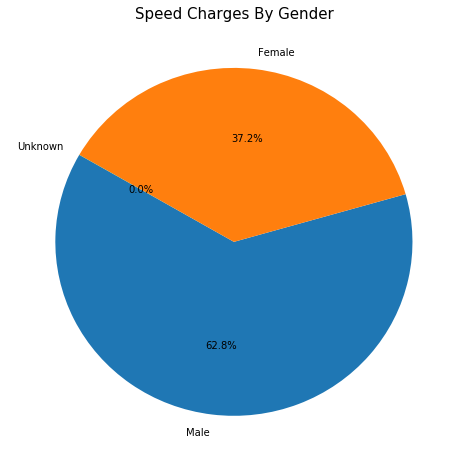

In [51]:
# Build Pie Chart for speed charges by gender
plt.rcParams['font.size'] = 10.0
fig = plt.figure(figsize=[8, 8])
plt.pie(speed["Number Of Charges"],labels=["Male" , "Female" , "Unknown"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('Speed Charges By Gender',fontsize= 15)


Text(0,0.5,'Number Of Charges')

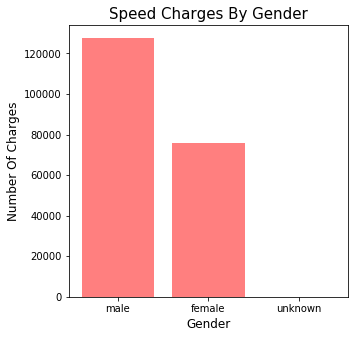

In [52]:
# Build bar Chart for speed charges by gender
x_axis = np.arange(len(speed_amount))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, speed["Number Of Charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = ["male" , "female" , "unknown"]
plt.xticks(tick_locations, tick_title )
plt.title("Speed Charges By Gender" ,fontsize= 15)
plt.xlabel("Gender",fontsize= 12)
plt.ylabel("Number Of Charges",fontsize= 12)

In [143]:
#seprating speed charges by races
race_speed=Traffic_final_data.loc[Traffic_final_data.Description  == "SPEEDING"].Race.value_counts()

racespeed=race_speed.reset_index()
racespeed = racespeed.rename(columns={'index': 'Race', 'Race': 'Number Of Speed Charges'})
racespeed

,Race,Number Of Speed Charges
0,WHITE,95441
1,BLACK,50239
2,HISPANIC,30543
3,ASIAN,14482
4,OTHER,12314
5,NATIVE AMERICAN,390


Text(0.5,1,'Speed Charges By Race')

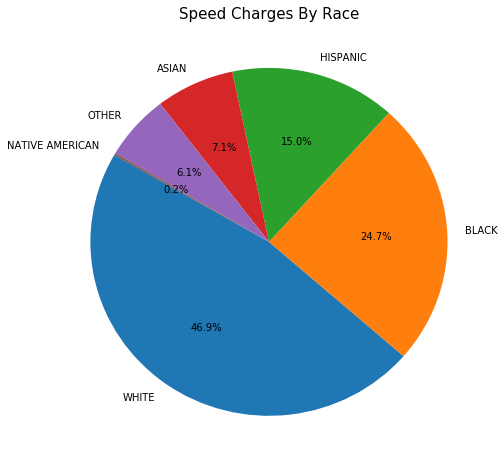

In [144]:
# Build Pie Chart for speed charges by Race
plt.rcParams['font.size'] = 10.0
fig = plt.figure(figsize=[8, 8])
plt.pie(racespeed["Number Of Speed Charges"],labels=racespeed["Race"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('Speed Charges By Race',fontsize= 15)


Text(0,0.5,'Number Of Speed Charges')

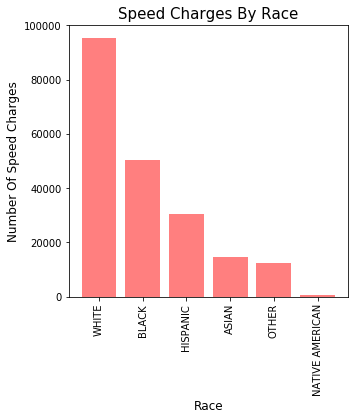

In [145]:
# Build bar Chart for speed charges by Race
x_axis = np.arange(len(racespeed))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, racespeed["Number Of Speed Charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = racespeed["Race"]
plt.xticks(tick_locations, tick_title , Rotation=90 )
plt.title("Speed Charges By Race"  ,fontsize= 15)
plt.xlabel("Race",fontsize= 12)
plt.ylabel("Number Of Speed Charges",fontsize= 12)

In [146]:
#seprating INFLUENCE OF ALCOHOL charges by gender
alcohol_amount=Traffic_final_data.loc[Traffic_final_data.Description == "INFLUENCE OF ALCOHOL"].Gender.value_counts()
alcohol=alcohol_amount.reset_index()
alcohol= alcohol.rename(columns={'index': 'Gender', 'Gender': 'Number Of Charges'})
alcohol

,Gender,Number Of Charges
0,M,30004
1,F,8015
2,U,2


Text(0.5,1,'Influence Of Alcohol Charges By Gender')

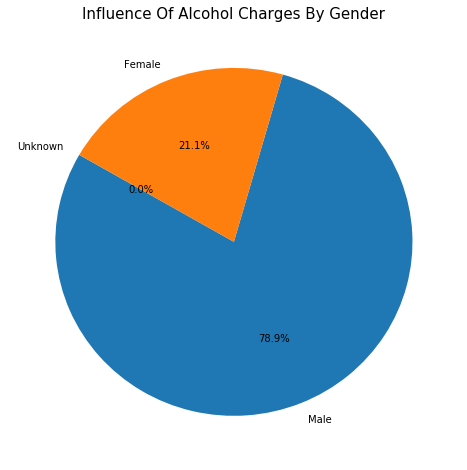

In [147]:
# Build Pie Chart for INFLUENCE OF ALCOHOL charges by gender
plt.rcParams['font.size'] = 10.0
fig = plt.figure(figsize=[8, 8])
plt.pie(alcohol["Number Of Charges"],labels=["Male" , "Female" , "Unknown"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('Influence Of Alcohol Charges By Gender',fontsize= 15)


Text(0,0.5,'Number Of Charges')

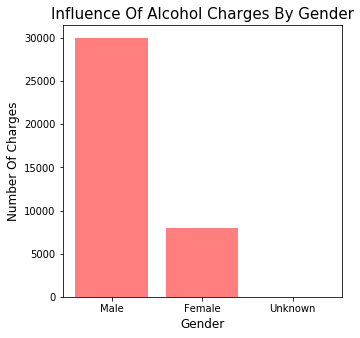

In [148]:
# Build bar Chart for INFLUENCE OF ALCOHOL charges by gender
x_axis = np.arange(len(speed_amount))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, alcohol["Number Of Charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = ["Male" , "Female" , "Unknown"]
plt.xticks(tick_locations, tick_title )
plt.title("Influence Of Alcohol Charges By Gender" ,fontsize= 15 )
plt.xlabel("Gender",fontsize= 12)
plt.ylabel("Number Of Charges",fontsize= 12)

In [149]:
#seprating Influence Of Alcohol charges by race
race_alcohol=Traffic_final_data.loc[Traffic_final_data.Description  == "INFLUENCE OF ALCOHOL"].Race.value_counts()

race_alcohol=race_alcohol.reset_index()
race_alcohol = race_alcohol.rename(columns={'index': 'Race', 'Race': 'Number Of Charges'})
race_alcohol

,Race,Number Of Charges
0,HISPANIC,13800
1,WHITE,12722
2,BLACK,9059
3,ASIAN,1364
4,OTHER,1014
5,NATIVE AMERICAN,62


Text(0.5,1,'Influence Of Alcohol Charges By Gender')

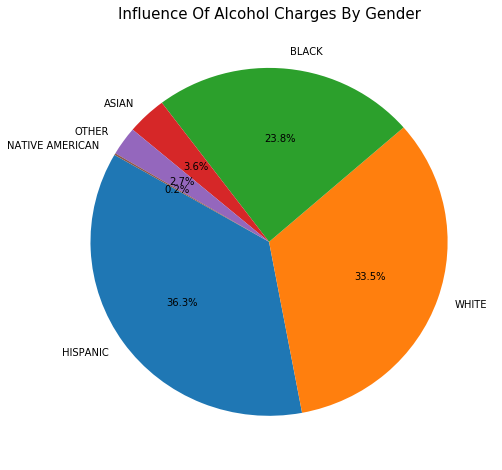

In [150]:
# Build Pie Chart for Influence Of Alcohol charges by Race
plt.rcParams['font.size'] = 10.0
fig = plt.figure(figsize=[8, 8])
plt.pie(race_alcohol["Number Of Charges"],labels=race_alcohol["Race"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('Influence Of Alcohol Charges By Gender',fontsize= 15)


Text(0,0.5,'Number Of  Charges')

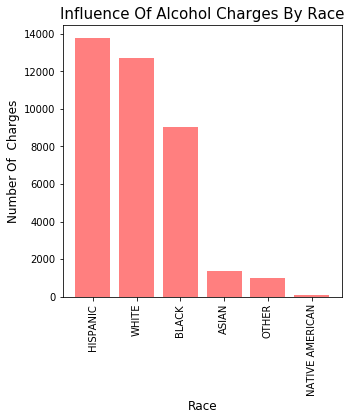

In [151]:
# Build bar Chart for Influence Of Alcohol charges by Race
x_axis = np.arange(len(race_alcohol))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, race_alcohol["Number Of Charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = race_alcohol["Race"]
plt.xticks(tick_locations, tick_title , Rotation=90 )
plt.title("Influence Of Alcohol Charges By Race"  ,fontsize= 15)
plt.xlabel("Race",fontsize= 12)
plt.ylabel("Number Of  Charges",fontsize= 12)

In [152]:
#seprating INFLUENCE OF ELECTRONIC DEVICE DISTRACTION charges by gender
gender_electronic=Traffic_final_data.loc[Traffic_final_data.Description == "ELECTRONIC DEVICE DISTRACTION"].Gender.value_counts()
gender_electronic=gender_electronic.reset_index()
gender_electronic= gender_electronic.rename(columns={'index': 'Gender', 'Gender': 'Number Of Charges'})
gender_electronic


,Gender,Number Of Charges
0,M,67026
1,F,32724
2,U,11


Text(0.5,1,'Electronic Device Distraction Charges By Gender')

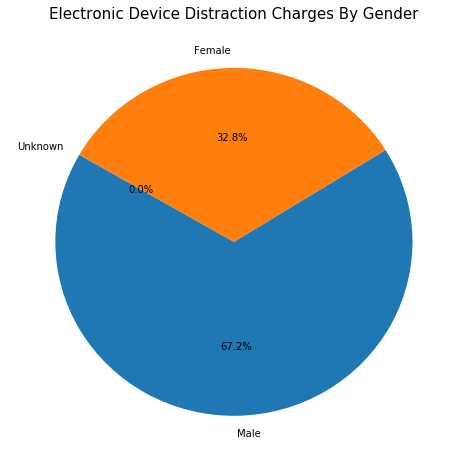

In [153]:
# Build Pie Chart for Electronic Device Distraction Charges By Gender
plt.rcParams['font.size'] = 10.0
fig = plt.figure(figsize=[8, 8])
plt.pie(gender_electronic["Number Of Charges"],labels=["Male" , "Female" , "Unknown"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('Electronic Device Distraction Charges By Gender',fontsize= 15)


Text(0,0.5,'Number Of Charges')

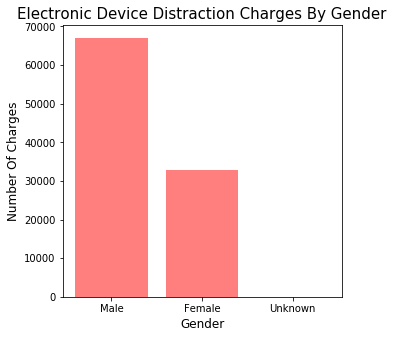

In [154]:
# Build bar Chart for Electronic Device Distraction Charges By Gender
x_axis = np.arange(len(gender_electronic))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, gender_electronic["Number Of Charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = ["Male" , "Female" , "Unknown"]
plt.xticks(tick_locations, tick_title )
plt.title("Electronic Device Distraction Charges By Gender" ,fontsize= 15 )
plt.xlabel("Gender",fontsize= 12)
plt.ylabel("Number Of Charges",fontsize= 12)

In [155]:
#seprating ELECTRONIC DEVICE DISTRACTION charges by races
race_electronic=Traffic_final_data.loc[Traffic_final_data.Description  == "ELECTRONIC DEVICE DISTRACTION"].Race.value_counts()
race_electronic=race_electronic.reset_index()
race_electronic = race_electronic.rename(columns={'index': 'Race', 'Race': 'Number Of Charges'})
race_electronic

,Race,Number Of Charges
0,WHITE,34882
1,BLACK,31442
2,HISPANIC,22192
3,OTHER,5620
4,ASIAN,5354
5,NATIVE AMERICAN,271


Text(0.5,1,'Electronic Device Distraction Charges By Race')

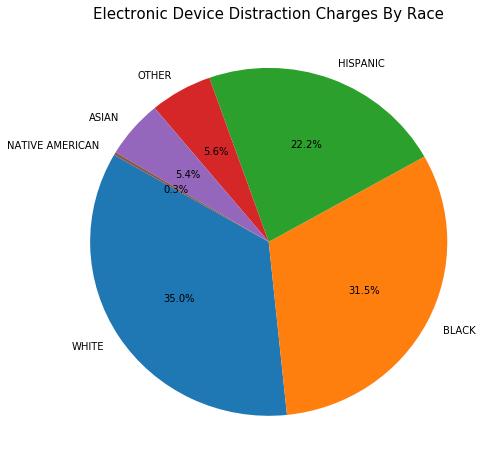

In [156]:
# Build Pie Chart for Electronic Device Distraction Charges By Race
plt.rcParams['font.size'] = 10.0
fig = plt.figure(figsize=[8, 8])
plt.pie(race_electronic["Number Of Charges"],labels=race_electronic["Race"], shadow = False ,   startangle=150, autopct = "%1.1f%%" )
plt.title('Electronic Device Distraction Charges By Race',fontsize= 15)


Text(0,0.5,'Number Of Charges')

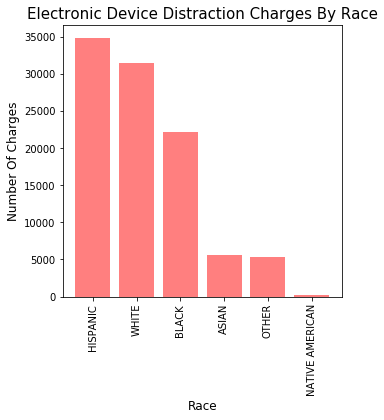

In [157]:
# Build bar Chart for Electronic Device Distraction charges by Race
x_axis = np.arange(len(race_alcohol))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, race_electronic["Number Of Charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = race_alcohol["Race"]
plt.xticks(tick_locations, tick_title , Rotation=90 )
plt.title("Electronic Device Distraction Charges By Race"  ,fontsize= 15)
plt.xlabel("Race",fontsize= 12)
plt.ylabel("Number Of Charges",fontsize= 12)

In [158]:
#Comparing charges amount during the last 7 years
Traffic=Traffic_final_data.Year.value_counts().reset_index()

Traffic2=pd.DataFrame(Traffic)
Traffic2.reset_index()
Traffic2= Traffic2.rename(columns={'index': 'Year', 'Year': 'Number of charges'})
Traffic2

,Year,Number of charges
0,2015,191398
1,2016,175881
2,2014,175371
3,2017,163257
4,2013,140428
5,2018,123743
6,2012,120971


In [159]:
traffic_sorted=Traffic2.sort_values('Year',ascending=True)
traffic_sorted

,Year,Number of charges
6,2012,120971
4,2013,140428
2,2014,175371
0,2015,191398
1,2016,175881
3,2017,163257
5,2018,123743


Text(0,0.5,'Number Of Charges')

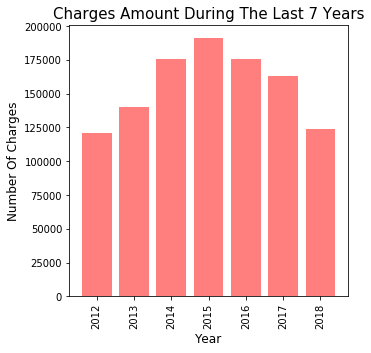

In [160]:
# Build bar Chart for all Traffic charges in the las 7 years
x_axis = np.arange(len(traffic_sorted))
plt.figure(figsize=(5, 5))
plt.bar(x_axis, traffic_sorted["Number of charges"], color='r', alpha=0.5, align="center" , width=.8 )
tick_locations = [value for value in x_axis]
tick_title = traffic_sorted["Year"]
plt.xticks(tick_locations, tick_title , Rotation=90 )
plt.title("Charges Amount During The Last 7 Years"  ,fontsize= 15)
plt.xlabel("Year",fontsize= 12)
plt.ylabel("Number Of Charges",fontsize= 12)

In [161]:
#Plot Traffic Charges and regression line
#Drop 2018 records in order to get a correct REGRESSION
x_axis =np.array( traffic_sorted["Year"])
x_axis = x_axis[:-1]
x_axis

#Drop 2018 records in order to get a correct REGRESSION
charges_count =np.array(traffic_sorted["Number of charges"])
charges_count = charges_count[:-1]
charges_count

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, charges_count)
fit = slope * x_axis + intercept

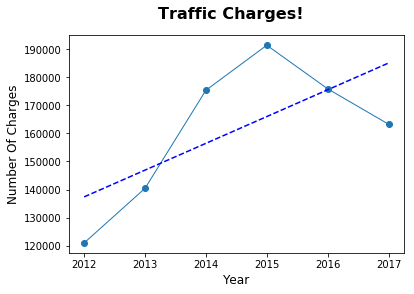

In [162]:
# Plot for Traffic charges in the last 6 years
fig, ax = plt.subplots()

fig.suptitle("Traffic Charges!", fontsize=16, fontweight="bold")

ax.set_xlabel("Year" , fontsize=12 )
ax.set_ylabel("Number Of Charges" , fontsize=12)

ax.plot(x_axis, charges_count, linewidth=1, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [163]:
# Plot for Speeding charges in the last 6 years
speed_year=Traffic_final_data.loc[Traffic_final_data.Description == "SPEEDING"].Year.value_counts()
speed_year=speed_year.reset_index()
speed_year= speed_year.rename(columns={'index': 'Year', 'Year': 'Number Of Speeding Charges'})
speed_year=speed_year.sort_values('Year',ascending=True)
speed_year

,Year,Number Of Speeding Charges
5,2012,27221
3,2013,29183
0,2014,32930
2,2015,32249
1,2016,32748
4,2017,28968
6,2018,20110


In [164]:
#Drop 2018 records in order to get a correct REGRESSION
x1_axis =np.array( speed_year["Year"])
x1_axis =x1_axis[:-1]
x1_axis

#Drop 2018 records in order to get a correct REGRESSION
charges_count =np.array(speed_year["Number Of Speeding Charges"])
charges_count =charges_count[:-1]
charges_count

array([27221, 29183, 32930, 32249, 32748, 28968], dtype=int64)

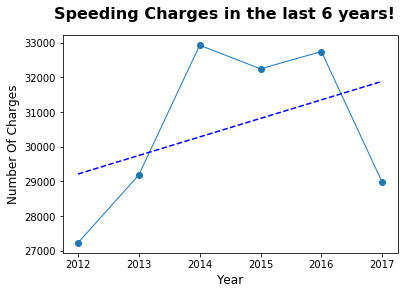

In [165]:
# Set line
(slope, intercept, _, _, _) = linregress(x1_axis, charges_count)
fit1 = slope * x1_axis + intercept



# Plot data
fig, ax = plt.subplots()

fig.suptitle("Speeding Charges in the last 6 years!", fontsize=16, fontweight="bold")

ax.set_xlabel("Year" , fontsize=12)
ax.set_ylabel("Number Of Charges" ,  fontsize=12)

ax.plot(x1_axis, charges_count, linewidth=1, marker='o')
ax.plot(x1_axis, fit1, 'b--')

plt.show()

In [166]:
# Plot for Electronic Device Distraction charges in the last 6 years
electronic_year=Traffic_final_data.loc[Traffic_final_data.Description == "ELECTRONIC DEVICE DISTRACTION"].Year.value_counts()
electronic_year=electronic_year.reset_index()
electronic_year= electronic_year.rename(columns={'index': 'Year', 'Year': 'Number Of Charges'})
electronic_year=electronic_year.sort_values('Year',ascending=True)
electronic_year

,Year,Number Of Charges
6,2012,7401
5,2013,9223
3,2014,16469
0,2015,18821
2,2016,16877
1,2017,17054
4,2018,13916


In [167]:
#Drop 2018 records in order to get a correct REGRESSION
x2_axis =np.array( electronic_year["Year"])
x2_axis =x2_axis[:-1]
x2_axis

#Drop 2018 records in order to get a correct REGRESSION
echarges_count =np.array(electronic_year["Number Of Charges"])
echarges_count =echarges_count[:-1]
echarges_count

array([ 7401,  9223, 16469, 18821, 16877, 17054], dtype=int64)

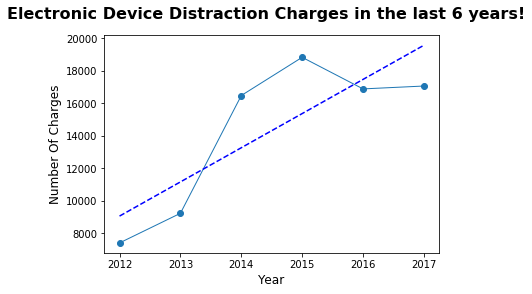

In [168]:
# Set line
(slope, intercept, _, _, _) = linregress(x2_axis, echarges_count)
fit2 = slope * x2_axis + intercept



# Plot data
fig, ax = plt.subplots()

fig.suptitle("Electronic Device Distraction Charges in the last 6 years!", fontsize=16, fontweight="bold")

ax.set_xlabel("Year" , fontsize=12)
ax.set_ylabel("Number Of Charges" , fontsize=12)

ax.plot(x2_axis, echarges_count, linewidth=1, marker='o')
ax.plot(x2_axis, fit2, 'b--')

plt.show()

In [169]:
# Plot for INFLUENCE OF ALCOHOL charges in the last 6 years
alcohol_year=Traffic_final_data.loc[Traffic_final_data.Description == "INFLUENCE OF ALCOHOL"].Year.value_counts()
alcohol_year=alcohol_year.reset_index()
alcohol_year= alcohol_year.rename(columns={'index': 'Year', 'Year': 'Number Of Charges'})
alcohol_year=alcohol_year.sort_values('Year',ascending=True)
alcohol_year



,Year,Number Of Charges
5,2012,4263
4,2013,4840
3,2014,5789
1,2015,6777
0,2016,6793
2,2017,5905
6,2018,3654


In [170]:
#Drop 2018 records in order to get a correct REGRESSION
x3_axis =np.array(alcohol_year["Year"])
x3_axis =x3_axis[:-1]
x3_axis

#Drop 2018 records in order to get a correct REGRESSION
alcohol_count =np.array(alcohol_year["Number Of Charges"])
alcohol_count =alcohol_count[:-1]
alcohol_count

array([4263, 4840, 5789, 6777, 6793, 5905], dtype=int64)

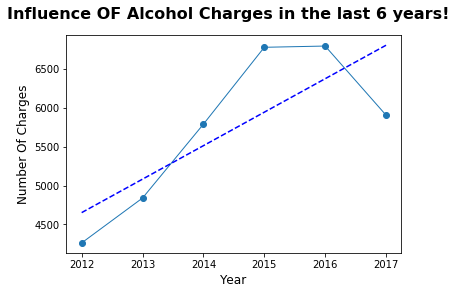

In [171]:
# Set line
(slope, intercept, _, _, _) = linregress(x3_axis, alcohol_count)
fit3 = slope * x3_axis + intercept



# Plot data
fig, ax = plt.subplots()

fig.suptitle("Influence OF Alcohol Charges in the last 6 years!", fontsize=16, fontweight="bold")

ax.set_xlabel("Year" , fontsize=12)
ax.set_ylabel("Number Of Charges" , fontsize=12)

ax.plot(x3_axis, alcohol_count, linewidth=1, marker='o')
ax.plot(x3_axis, fit3, 'b--')

plt.show()

Text(0.5,0,'Year')

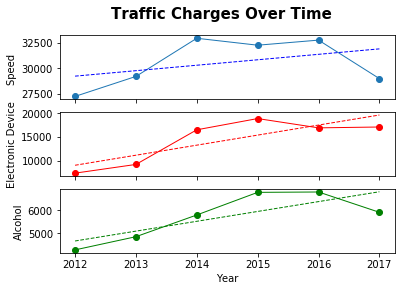

In [172]:
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex="col" , sharey='row')
fig.suptitle("Traffic Charges Over Time", fontsize=16, fontweight="bold" , size= 15)


ax1.plot(x1_axis, charges_count, linewidth=1, marker="o")
ax1.plot(x1_axis, fit1, 'b--', linewidth=1)
ax1.set_ylabel("Speed ")

ax2.plot(x2_axis, echarges_count, linewidth=1, marker="o", color="r")
ax2.plot(x2_axis, fit2, "r--", linewidth=1)
ax2.set_ylabel("Electronic Device")


ax3.plot(x3_axis, alcohol_count, linewidth=1, marker="o", color="g")
ax3.plot(x3_axis, fit3, "g--", linewidth=1)
ax3.set_ylabel("Alcohol")
ax3.set_xlabel("Year")



In [173]:
# Plot for Speeding charges in the last 6 years
speed_month=Traffic_final_data.loc[Traffic_final_data.Description == "SPEEDING"].Month.value_counts()
speed_month=speed_month.reset_index()
speed_month

,index,Month
0,3,20410
1,8,19816
2,7,19389
3,6,18686
4,4,17901
5,9,17035
6,5,16940
7,2,16593
8,10,16265
9,1,14592


In [174]:
speed_month= speed_month.rename(columns={'index': 'Month', 'Month': 'Number Of Charges'})
speed_month

,Month,Number Of Charges
0,3,20410
1,8,19816
2,7,19389
3,6,18686
4,4,17901
5,9,17035
6,5,16940
7,2,16593
8,10,16265
9,1,14592


In [175]:
#Reading the csv file and getting the dataframe
Traffic_pd=pd.read_csv("Traffic_violations_updated.csv")
Traffic_pd.head()

,Date Of Stop,Time Of Stop,Description,State,Violation Type,Charge,Contributed To Accident,Race,Gender,Geolocation,Year,Month
0,2017-08-29,10:19:00,TRAFFIC CONTROLDEVICE,VA,Citation,21-201(a1),No,WHITE,F,"(38.981725, -77.0927566666667)",2017,8
1,2013-10-08,13:23:00,DRIVING WITH SUSP.LICEN,MD,Citation,16-303,No,HISPANIC,M,"(39.0933833333333, -77.0795516666667)",2013,10
2,2012-03-19,16:10:00,ELECTRONIC DEVICE DISTRACTION,VA,Citation,21-1124,No,HISPANIC,M,"(38.9827307333333, -77.1007551666667)",2012,3
3,2012-06-09,21:19:00,NO SEAT BELT/CHILD SAFTEY,MD,Citation,22-412,No,WHITE,F,"(39.06914295, -76.9696780666667)",2012,6
4,2012-12-20,00:41:00,INFLUENCE OF ALCOHOL,MD,Citation,21-902,No,WHITE,M,"(38.9835782, -77.09310515)",2012,12


In [176]:
#function to calculate the warning and citations from the Violation type column
def compute_outcome_stats(df):
 #   """Compute statistics regarding the relative quanties of  warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['Violation Type'] == 'Warning'])
    n_citations = len(df[df['Violation Type'] == 'Citation'])
    try:
        citations_per_warning = n_citations / n_warnings
    except ZeroDivisionError:
        citations_per_warning=0
    

    return(pd.Series(data = {
        'total': n_total,
        'warnings': n_warnings,
        'citations': n_citations,
        'citations_per_warning': citations_per_warning,
        
    }))

In [177]:
#function to compute the analysis of top 5 charges
def compute_outcome_Charges(df):
    """Compute statistics regarding the relative quanties oftop five charges"""
    Total_charges=len(df)
    DRIVING_SUSP_LICEN = len(df[df['Charge'] == '16-303'])
    SPEEDING= len(df[df['Charge'] == '201-801'])
    TRAFFIC_CONTROLDEVICE=len(df[df['Charge'] == '21-201(a1)'])
    ELECTRONIC_DEVICE_DISTRACTION=len(df[df['Charge'] == '21-1124'])
    DISPLAY_REGISTRATION_PLATE=len(df[df['Charge'] == '13-411'])

    return(pd.Series(data = {
        "TOTAL CHARGES":Total_charges,
        'DRIVING WITH SUSP.LICEN':DRIVING_SUSP_LICEN,
        'SPEEDING': SPEEDING,
        'TRAFFIC CONTROLDEVICE': TRAFFIC_CONTROLDEVICE,
        'ELECTRONIC DEVICE DISTRACTION': ELECTRONIC_DEVICE_DISTRACTION,
        'DISPLAY REGISTRATION PLATE':DISPLAY_REGISTRATION_PLATE,
    }))

In [ ]:
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex="col" , sharey='row')
fig.suptitle("Traffic Charges by race Over Time", fontsize=16, fontweight="bold" , size= 15)


ax1.plot(x1_axis, charges_count, linewidth=1, marker="o")
ax1.plot(x1_axis, fit1, 'b--', linewidth=1)
ax1.set_ylabel("Speed ")

ax2.plot(x2_axis, echarges_count, linewidth=1, marker="o", color="r")
ax2.plot(x2_axis, fit2, "r--", linewidth=1)
ax2.set_ylabel("Electronic Device")


ax3.plot(x3_axis, alcohol_count, linewidth=1, marker="o", color="g")
ax3.plot(x3_axis, fit3, "g--", linewidth=1)
ax3.set_ylabel("Alcohol")
ax3.set_xlabel("Year")

